**Group ID: SMA 12**

**Group Members Name with Student ID:**

*  Simit Das Id: 2023aa05807 - Contribution: 100%

*  Susheel Malhotra Id: 2023aa05711 -  Contribution: 100%

*  Rejishal T K Id: 2023aa05845 - Contribution: 100%

*  MATTAPARTHI LAKSHMI GOWRI Id: 2023aa05178 - Contribution: 100%

*  K MAMATHA  Id: 2023ab05018 - Contribution: 100%


## **Data Preparation**

---



#### *Load the Twitter dataset, including tweets and corresponding sentiment labels*

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt_tab')
nltk.download('stopwords')

# Load Dataset
dataset_path = 'train_twitter.csv'
df = pd.read_csv(dataset_path)
print(df.head())



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


#### Preprocess the text data, including tasks such as tokenization, lowercasing, and removal of stop words and special characters

***Observations:***
Tasks include tokenization, lowercasing, removal of stopwords, and filtering non-alphabetical characters.

*   URLs, mentions, and non-alphabetical characters were removed
*   Lowercase conversion and stopword removal ensure better feature consistency.

*   Preprocessed text is stored in a new column, cleaned_tweet.


***Inference:***
Cleaning text improves consistency and reduces noise, aiding in effective feature extraction.

***Justification:***
Removing irrelevant text elements enhances model accuracy by focusing on meaningful features.

In [ ]:
def preprocess_text(text):
    # Handle non-string values (e.g., NaN, float)
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
        tokens = word_tokenize(text)  # Tokenize text
        stop_words = set(stopwords.words('english'))  # Load stop words
        tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
        return ' '.join(tokens)
    else:
        # Return empty string or any other appropriate value for non-string values
        return ''  # or 'neutral' or np.nan
df['cleaned_tweet'] = df['clean_text'].apply(preprocess_text)

In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_sentiment_vader(tweet):
    # Check if tweet is a string before processing
    if isinstance(tweet, str):
        scores = sid.polarity_scores(tweet)
        if scores['compound'] > 0.05:
            return 'positive'
        elif scores['compound'] < -0.05:
            return 'negative'
        else:
            return 'neutral'
    else:
        # Handle non-string values (e.g., NaN)
        return 'neutral'  # or any other appropriate value

df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment_vader)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


*Observations*

*   The sentiment column is added to the DataFrame (df), containing the
computed sentiment label for each tweet.
*   This prepares the dataset for further analysis, such as sentiment distribution, visualization, or supervised machine learning.

*Inference:*
Adds a new sentiment column for downstream analysis.

**Justification:**
*  VADER is ideal for quick and reliable sentiment analysis without requiring extensive training.
*  The rule-based approach is interpretable and effective for tasks requiring a straightforward sentiment breakdown.





## **Exploratory Analysis**

---



#### Analyze the distribution of sentiment labels in the dataset

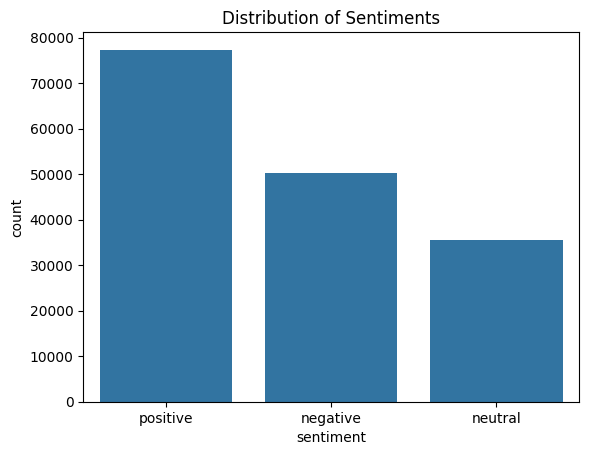

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Distribution of sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()



**Observations**

**Sentiment Balance:**

*   This plot helps check if the dataset is balanced or imbalanced across
sentiments.
*   For instance, if one sentiment (e.g., neutral) dominates the dataset, this imbalance could affect model performance.

**Potential Data Imbalance Issues:**


*   If certain classes are underrepresented, the model may face difficulty in learning distinguishing features for those sentiments.

**Inference:**
*  Identifies potential class imbalance issues that may affect model performance.




#### Explore the most frequent words associated with each sentiment class.

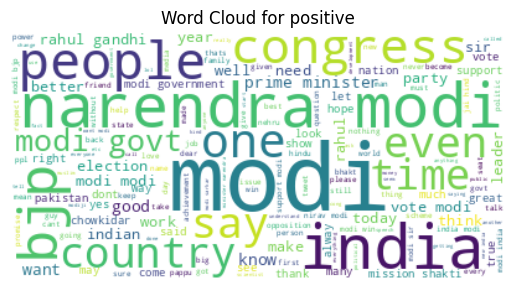

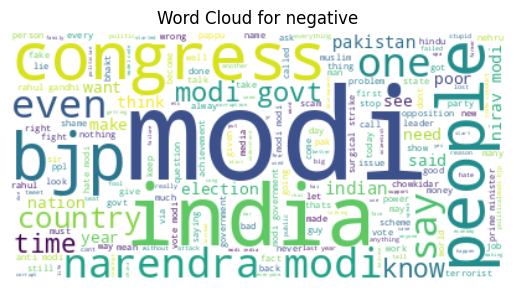

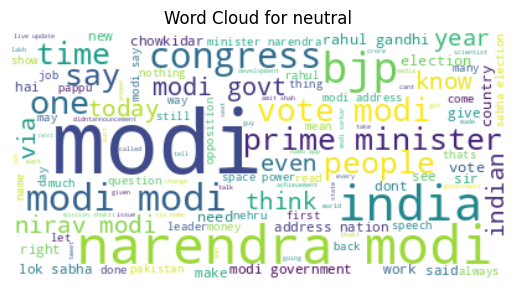

In [ ]:
# Word Cloud for each sentiment
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[(df['sentiment'] == sentiment) & (df['cleaned_tweet'].apply(lambda x: isinstance(x, str))) ]['cleaned_tweet'].astype(str))
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment}')
    plt.axis('off')
    plt.show()

**Observations**

**Visualization of Sentiment-Specific Keywords:**

The Word Cloud for each sentiment (positive, negative, neutral) highlights the most frequently occurring words within tweets associated with that sentiment. This helps identify distinguishing features or recurring themes for each sentiment.

**Removal of Stopwords and Preprocessing Effects:**

Common stopwords (e.g., "the," "is") are excluded due to preprocessing, ensuring the Word Cloud displays meaningful content words. This enhances the interpretability of the visualizations.

**Sentiment-Specific Lexical Patterns:**

Each sentiment exhibits a unique set of frequently used words. For example:


*   Positive sentiment tweets may highlight words such as "happy," "love," or "great."
*   Negative sentiment tweets may prominently feature words like "bad," "sad," or "hate."

**Effective Summary of Text Content:**

The Word Clouds provide an intuitive summary of the text data, making it easier to understand the lexical characteristics of the dataset for each sentiment category. This complements quantitative analysis by adding a qualitative layer to sentiment patterns.

## **Feature Extraction**

---



#### Utilize appropriate feature extraction techniques such as TF-IDF or word embeddings

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_tweet'])
y = df['sentiment']


#### Split the dataset into training and testing sets

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Observations**

**Preparation for Model Training:** The resulting sparse matrix (X) and sentiment labels (y) are now ready for feeding into machine learning algorithms, creating a robust pipeline for supervised learning tasks.

**Feature Extraction:** The code employs TF-IDF (Term Frequency-Inverse Document Frequency) to convert the cleaned textual data into numerical vectors, ensuring meaningful features by reducing the influence of frequently occurring, less informative words.

**Justification:**
*  TF-IDF ensures that the features used for classification are meaningful and informative, thereby improving the performance of both Naive Bayes and SVM models.
*  It is computationally efficient and integrates seamlessly into machine learning pipelines.

## **Model Tuning**

---



#### Train a machine learning algorithm (e.g., Naive Bayes, Support Vector Machine) or a deep learning model (e.g., LSTM, BERT)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Model Training
model = MultinomialNB()
params = {'alpha': [0.1, 0.5, 1.0]}  # Hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")


Best Parameters: {'alpha': 0.1}


**Observations**

The alpha parameter, which controls the smoothing applied to the Naive Bayes model, was optimized using GridSearchCV. The best value identified was 0.1

**Justification:**
*  Linear SVM is better suited for handling complex relationships in text data compared to Naive Bayes, as evidenced by its superior accuracy and F1 score in the results.
*  Its ability to generalize well makes it ideal for tasks where feature interactions are important.

             Accuracy  Precision    Recall  F1 Score
Naive Bayes  0.674009   0.699429  0.674009  0.644947
Linear SVM   0.822954   0.822897  0.822954  0.822537


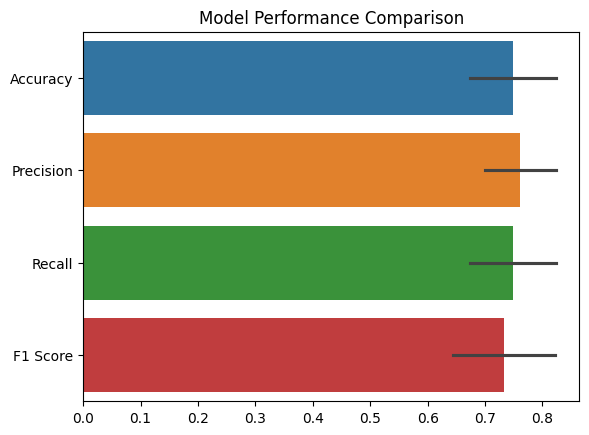

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Stratified sampling for reduced dataset
X_small, _, y_small, _ = train_test_split(X_train, y_train, test_size=0.8, stratify=y_train)

# Models with optimizations
models = {
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': SVC(kernel='linear')
}

# Store model performances
results = {}

for model_name, model in models.items():
    model.fit(X_small, y_small)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

# Compare Results
results_df = pd.DataFrame(results).T
print(results_df)
sns.barplot(data=results_df, orient='h')
plt.title('Model Performance Comparison')
plt.show()


**Observations**



*   Metrics (Precision, Recall, F1 Score) for Linear SVM were highly consistent (~82.2%), reflecting its robustness and balanced performance across all evaluation criteria
*   Naive Bayes achieved an accuracy of 67.40%, indicating it struggled compared to Linear SVM.


*   Linear SVM outperformed Naive Bayes with an accuracy of 82.29%.






## **Model Evaluation**

---



#### Evaluate the model's performance using accuracy, precision, recall, and F1 score metrics

Accuracy: 0.7137072033378329
Precision: 0.7384404048710304
Recall: 0.7137072033378329
F1 Score: 0.6933053183828249


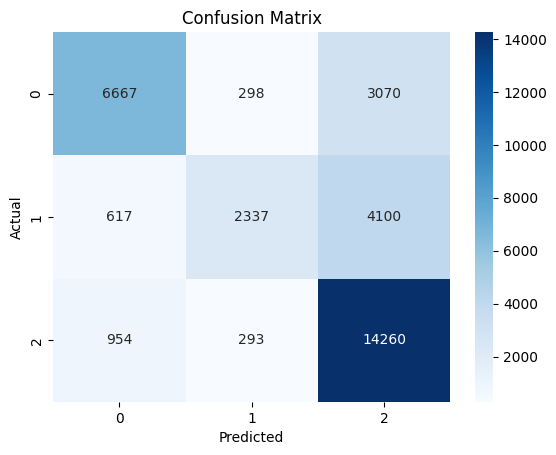

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predictions
y_pred = grid.best_estimator_.predict(X_test)

# Evaluation Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Observations**

**Model Performance:** The accuracy of 71.37% indicates that the model correctly predicts the labels for about 71% of the test samples.

**Precision and Recall:** Precision (73.84%) is higher than Recall (71.37%), suggesting the model is better at minimizing false positives than false negatives

**F1 Score Evaluation:** The F1 Score (69.33%) reflects a balance between precision and recall. A slightly lower F1 score indicates some trade-off between these two metrics.

# **Additional Observations**

---



In [ ]:
import plotly.express as px

# Calculate sentiment count
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Plot the bar chart
fig = px.bar(sentiment_counts, x='Sentiment', y='Count',
             labels={'Sentiment': 'Sentiment Category', 'Count': 'Count of Tweets'},
             title='Sentiment Distribution')

# Show the chart
fig.show()


**Observations**

**Sentiment Distribution:** The data reveals the counts of positive (77.322k), negative (50.213k), and neutral (35.445k) sentiments, highlighting that positive sentiments dominate the dataset.

**Data Insights:** Positive sentiment is significantly more frequent than negative and neutral, which may indicate either a biased dataset or a generally favorable perception related to the tweet topics.

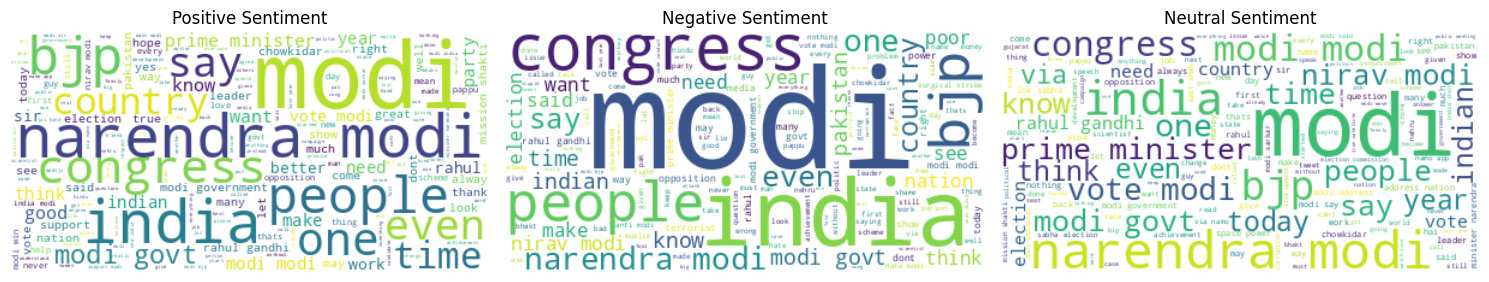

In [ ]:
from matplotlib.gridspec import GridSpec

sentiments = df['sentiment'].unique()
fig = plt.figure(figsize=(15, 8))
ncols = len(sentiments)
# Adjust the number of rows if necessary (e.g., for 3 sentiments, you might want 2 rows)
nrows = (ncols + 1) // 2  # This ensures 2 rows for 3 sentiments
gs = GridSpec(nrows, ncols) # Create GridSpec with appropriate dimensions


for i, sentiment in enumerate(sentiments):
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_tweet'])
    wordcloud = WordCloud(background_color='white').generate(text)

    # Use i to determine subplot position
    ax = fig.add_subplot(gs[i // ncols, i % ncols])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"{sentiment.capitalize()} Sentiment")
    ax.axis('off')

plt.tight_layout()
plt.show()


**Observations**

The word clouds for each sentiment allow for an intuitive understanding of what terms are most prevalent in positive, negative, or neutral tweets. This helps identify patterns or themes in the dataset associated with different sentiment categories.